In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
white_clean = pd.read_csv('/Users/divyasusarla/Desktop/DSI-SF-2-divyasusarla/Capstone/Clean_Data/white_wine_details_clean.csv', encoding='utf-8')

In [3]:
del white_clean['Unnamed: 0']
white_clean.head()

,wine_index,white_wine,white_wineries,white_regions,white_countries,white_avg_wine_ratings,white_avg_price,vintage_year
0,0,Chardonnay Hudson Vineyard,Patz & Hall,Sonoma County,United States,4.0,54.99,NaN
1,1,Meursault-Blagny,Thierry et Pascale Matrot,C\xf4te de Beaune,France,3.9,47.68,NaN
2,2,Domaine de La Chapelle Les Grands Climats Poui...,Catherine et Pascal Rollet,Bourgogne,France,4.1,29.97,2013.0
3,3,Sauvignon Blanc 2014,Ancient Peaks,California,United States,4.0,12.98,2014.0
4,4,"[u""Champion's Lot Riva Ranch Chardonnay 2013""]",Wente,Livermore Valley,United States,3.8,24.98,2013.0


# Scatter plot of wine vs. price:

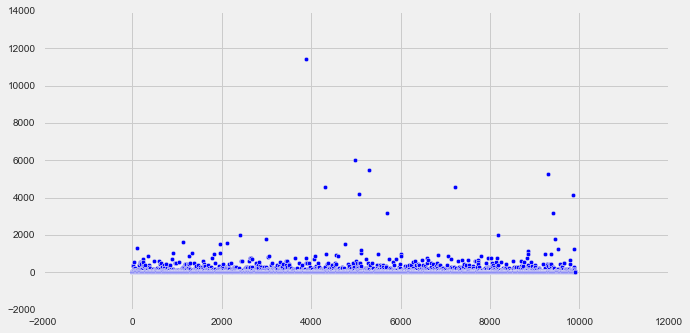

In [36]:
x = white_clean['wine_index']
y = white_clean['white_avg_price']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
plt.show()

# Histogram of the range of prices for wines:

Given the wide range of prices, I want to bucket my wines into price ranges so I have a better sense of the spread:

In [5]:
white_clean['white_avg_price'].describe()

//anaconda/envs/dsi/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count     9871.000000
mean        52.409602
std        207.151914
min          0.010000
25%               NaN
50%               NaN
75%               NaN
max      11432.000000
Name: white_avg_price, dtype: float64

In [10]:
def price_bins(value):
    if value <= 10:
        return 1
    if value > 11 and value <= 20:
        return 2
    if value > 21 and value <= 30:
        return 3
    if value > 31 and value <= 40:
        return 4
    if value > 41 and value <= 50:
        return 5
    if value > 51 and value <= 60:
        return 6
    if value > 61 and value <= 100:
        return 7
    if value > 101 and value <= 150:
        return 8
    if value > 151 and value <= 250:
        return 9
    if value > 251 and value <= 500:
        return 10
    if value > 501:
        return 11

In [11]:
white_clean['Price_Buckets'] = white_clean['white_avg_price'].map(price_bins)

In [12]:
white_clean.head()

,wine_index,white_wine,white_wineries,white_regions,white_countries,white_avg_wine_ratings,white_avg_price,vintage_year,Price_Buckets
0,0,Chardonnay Hudson Vineyard,Patz & Hall,Sonoma County,United States,4.0,54.99,NaN,6.0
1,1,Meursault-Blagny,Thierry et Pascale Matrot,C\xf4te de Beaune,France,3.9,47.68,NaN,5.0
2,2,Domaine de La Chapelle Les Grands Climats Poui...,Catherine et Pascal Rollet,Bourgogne,France,4.1,29.97,2013.0,3.0
3,3,Sauvignon Blanc 2014,Ancient Peaks,California,United States,4.0,12.98,2014.0,2.0
4,4,"[u""Champion's Lot Riva Ranch Chardonnay 2013""]",Wente,Livermore Valley,United States,3.8,24.98,2013.0,3.0


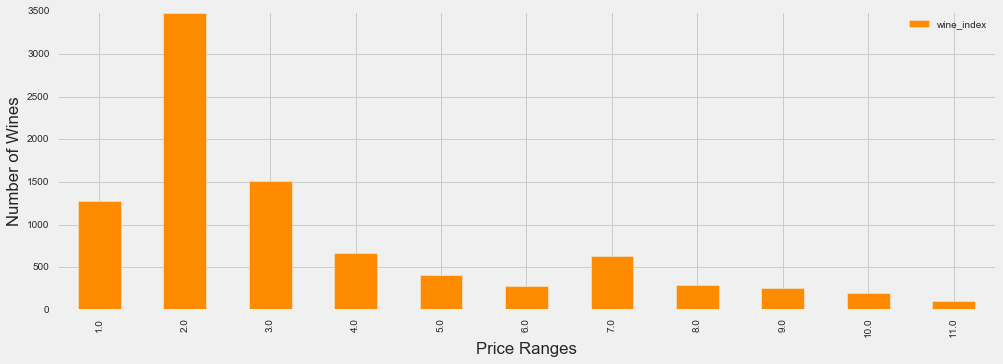

In [34]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

white_clean.groupby('Price_Buckets')[['wine_index']].count().plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_xlabel('Price Ranges')
ax.set_ylabel('Number of Wines')
# need to reset labels
# ax.set_xticklabels(['$0-25', '$26-50', '$51-75', '$76-100', '$101-150', '$151-200', '$201-250',
#                    '$251-300', '$301-500', '$501-1000', '>$1001'], rotation=65)

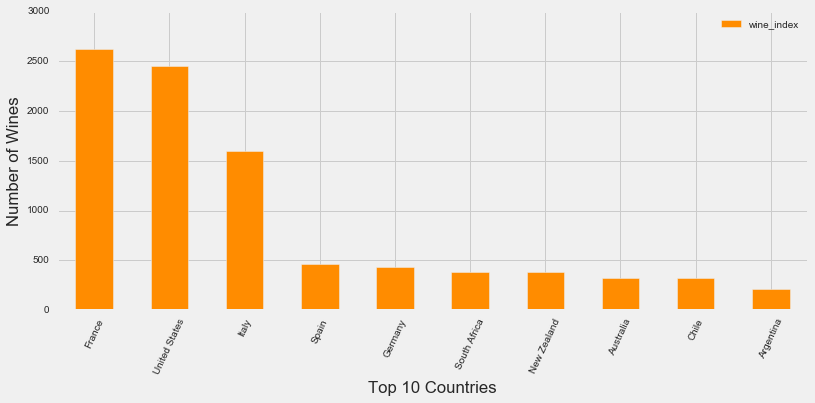

In [33]:
fig = plt.figure(figsize=(12,5))
ax = fig.gca()

white_clean.groupby('white_countries')[['wine_index']].count().sort_values(
    'wine_index', ascending=False).head(10).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_xlabel('Top 10 Countries')
ax.set_ylabel('Number of Wines')
ax.set_xticklabels(['France', 'United States', 'Italy', 'Spain', 'Germany', 'South Africa', 'New Zealand',
                   'Australia', 'Chile', 'Argentina'], rotation=65)

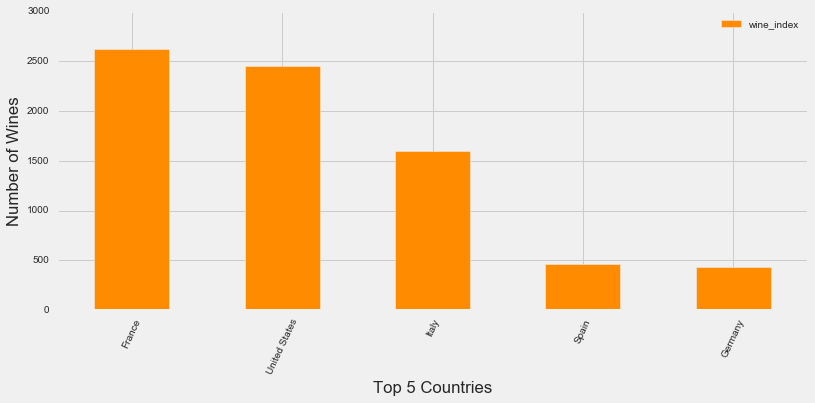

In [32]:
fig = plt.figure(figsize=(12,5))
ax = fig.gca()

white_clean.groupby('white_countries')[['wine_index']].count().sort_values(
    'wine_index', ascending=False).head(5).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_xlabel('Top 5 Countries')
ax.set_ylabel('Number of Wines')
ax.set_xticklabels(['France', 'United States', 'Italy', 'Spain', 'Germany'], rotation=65)

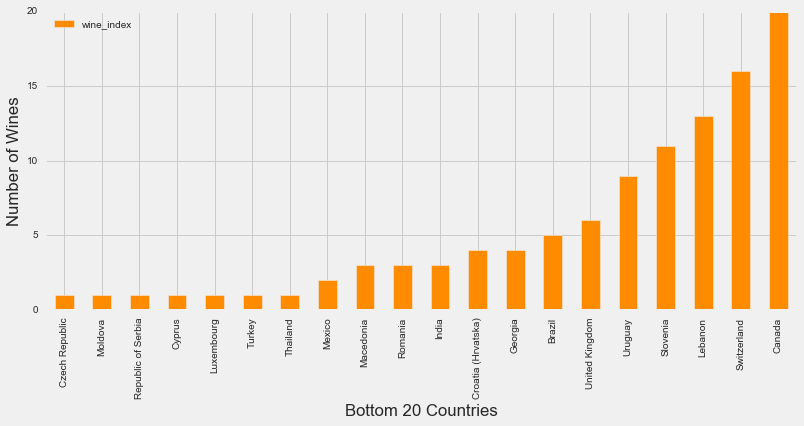

In [31]:
fig = plt.figure(figsize=(12,5))
ax = fig.gca()

white_clean.groupby('white_countries')[['wine_index']].count().sort_values(
    'wine_index', ascending=True).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_xlabel('Bottom 20 Countries')
ax.set_ylabel('Number of Wines')
# ax.set_xticklabels(rotation=65)

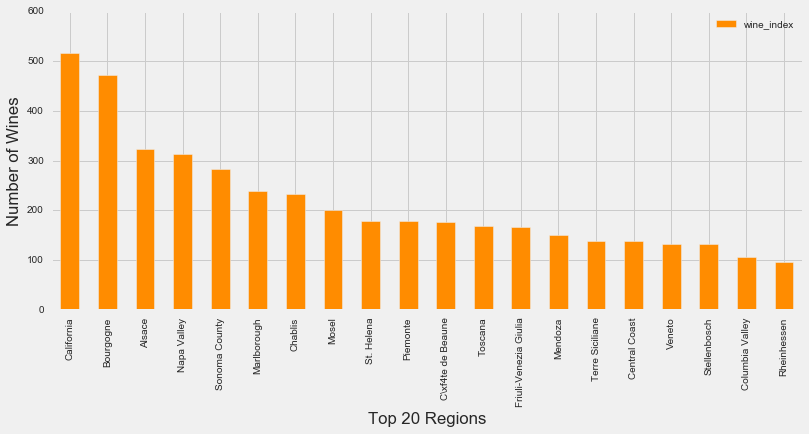

In [30]:
fig = plt.figure(figsize=(12,5))
ax = fig.gca()

white_clean.groupby('white_regions')[['wine_index']].count().sort_values(
    'wine_index', ascending=False).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_xlabel('Top 20 Regions')
ax.set_ylabel('Number of Wines')
# need to reset labels here:
# ax.set_xticklabels(['France', 'United States', 'Italy', 'Spain', 'Australia', 'Argentina', 'South Africa',
#                    'Chile', 'Portugal', 'New Zealand'], rotation=65)

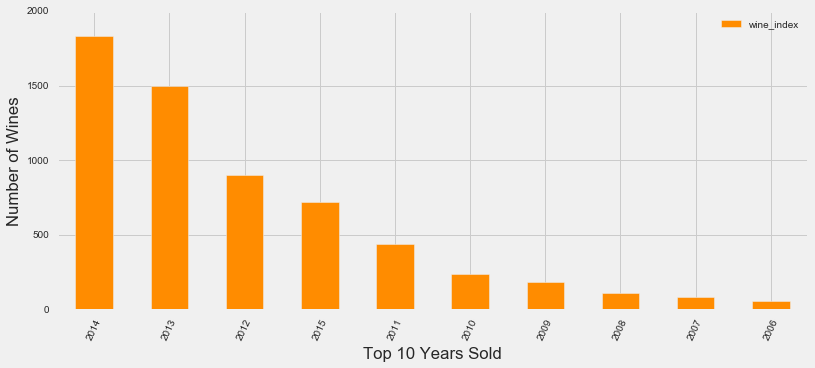

In [29]:
fig = plt.figure(figsize=(12,5))
ax = fig.gca()

white_clean.groupby('vintage_year')[['wine_index']].count().sort_values(
    'wine_index', ascending=False).head(10).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_xlabel('Top 10 Years Sold')
ax.set_ylabel('Number of Wines')
ax.set_xticklabels(['2014', '2013', '2012', '2015', '2011', '2010', '2009',
                   '2008', '2007', '2006'], rotation=65)

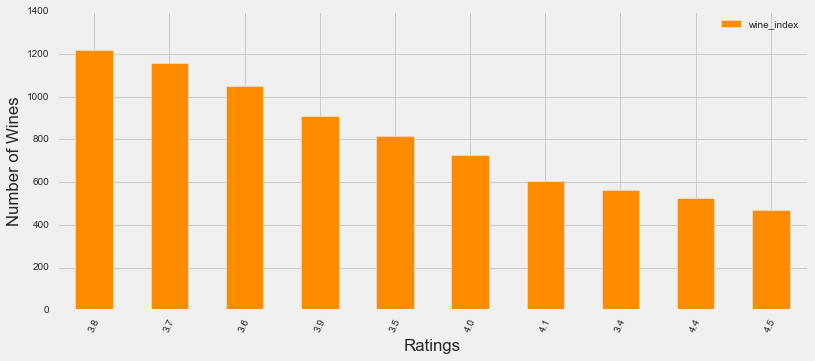

In [38]:
fig = plt.figure(figsize=(12,5))
ax = fig.gca()

white_clean.groupby('white_avg_wine_ratings')[['wine_index']].count().sort_values(
    'wine_index', ascending=False).head(10).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_xlabel('Ratings')
ax.set_ylabel('Number of Wines')
ax.set_xticklabels(['3.8', '3.7', '3.6', '3.9', '3.5', '4.0', '4.1',
                   '3.4', '4.4', '4.5'], rotation=65)